In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [268]:
df = pd.read_csv('filmtv_movies.csv')
df.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


In [269]:
# Take values only year after 1999 in the column 'year'
df = df[df['year'] > 1999]

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20820 entries, 1698 to 40298
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     20820 non-null  int64  
 1   title         20820 non-null  object 
 2   year          20820 non-null  int64  
 3   genre         20772 non-null  object 
 4   duration      20820 non-null  int64  
 5   country       20813 non-null  object 
 6   directors     20800 non-null  object 
 7   actors        19305 non-null  object 
 8   avg_vote      20820 non-null  float64
 9   critics_vote  16950 non-null  float64
 10  public_vote   20492 non-null  float64
 11  total_votes   20820 non-null  int64  
 12  description   20631 non-null  object 
 13  notes         8159 non-null   object 
 14  humor         20820 non-null  int64  
 15  rhythm        20820 non-null  int64  
 16  effort        20820 non-null  int64  
 17  tension       20820 non-null  int64  
 18  erotism       20820 non

In [271]:
df.isnull().sum()

filmtv_id           0
title               0
year                0
genre              48
duration            0
country             7
directors          20
actors           1515
avg_vote            0
critics_vote     3870
public_vote       328
total_votes         0
description       189
notes           12661
humor               0
rhythm              0
effort              0
tension             0
erotism             0
dtype: int64

In [272]:
# split the values in the "country" column by comma separator and create separate rows for each country
df = df.assign(country=df['country'].str.split(',')).explode('country')

# reset the index of the dataframe
df = df.reset_index(drop=True)

In [273]:
# Drop columns 'description' and 'notes' 
df.drop(['description', 'notes'], axis=1, inplace=True)
# Drop rows of columns 'actors', 'public_votes' and 'critics_votes' with null values
df.dropna(subset=['actors', 'public_vote', 'critics_vote'], inplace=True)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20180 entries, 0 to 26753
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     20180 non-null  int64  
 1   title         20180 non-null  object 
 2   year          20180 non-null  int64  
 3   genre         20131 non-null  object 
 4   duration      20180 non-null  int64  
 5   country       20177 non-null  object 
 6   directors     20165 non-null  object 
 7   actors        20180 non-null  object 
 8   avg_vote      20180 non-null  float64
 9   critics_vote  20180 non-null  float64
 10  public_vote   20180 non-null  float64
 11  total_votes   20180 non-null  int64  
 12  humor         20180 non-null  int64  
 13  rhythm        20180 non-null  int64  
 14  effort        20180 non-null  int64  
 15  tension       20180 non-null  int64  
 16  erotism       20180 non-null  int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 2.8+ MB


In [274]:
# Removing the duplicates if any
duplicates = df.duplicated()
print(duplicates)
print("Number of duplicates:", duplicates.sum())
df.drop_duplicates(inplace=True)

0        False
1        False
2        False
3        False
4        False
         ...  
26737    False
26738    False
26743    False
26744    False
26753    False
Length: 20180, dtype: bool
Number of duplicates: 0


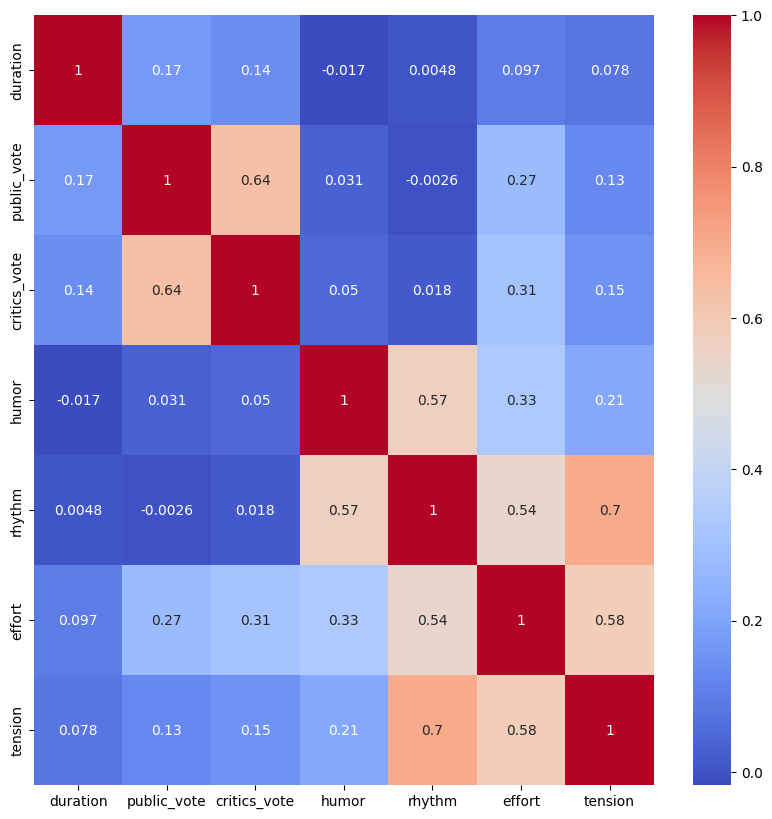

In [275]:
# Make a df_corr with columns 'public_vote', 'critics_vote', 'duration', 'year' , 'humor', 'rythom' , 'effort', 'effort', 'tension' 
df_corr = df[['year','duration','public_vote', 'critics_vote'  , 'humor', 'rhythm', 'effort', 'tension']]
# set index to 'year'
df_corr.set_index('year', inplace=True)
# Make a correlation matrix
corr = df_corr.corr()
# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [276]:
# Making a new row for movies with mutiple directors
# loop through each row in the dataframe
for index, row in df.iterrows():
    # check if the "directors" column contains multiple directors
    if ',' in str(row['directors']):
        # split the directors into a list
        directors_list = row['directors'].split(',')
        # update the "directors" column with the first director
        df.at[index, 'directors'] = directors_list[0].strip()
        # add a new row for each additional director
        for director in directors_list[1:]:
            # check if the value is not NaN
            if not pd.isna(director):
                new_row = row.copy()
                new_row['directors'] = director.strip() # set the director for the new row
                df = df.append(new_row) # add the new row to the original dataframe

# reset the index of the modified dataframe
df.reset_index(drop=True, inplace=True)

/var/folders/pp/s3n9tcsd1f7dn5x615mnz9v00000gn/T/ipykernel_2375/1695506513.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row) # add the new row to the original dataframe
/var/folders/pp/s3n9tcsd1f7dn5x615mnz9v00000gn/T/ipykernel_2375/1695506513.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row) # add the new row to the original dataframe
/var/folders/pp/s3n9tcsd1f7dn5x615mnz9v00000gn/T/ipykernel_2375/1695506513.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row) # add the new row to the original dataframe
/var/folders/pp/s3n9tcsd1f7dn5x615mnz9v00000gn/T/ipykernel_2375/1695506513.py:16: FutureWarning: The frame.append method is deprecated and will b

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21815 entries, 0 to 21814
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     21815 non-null  int64  
 1   title         21815 non-null  object 
 2   year          21815 non-null  int64  
 3   genre         21763 non-null  object 
 4   duration      21815 non-null  int64  
 5   country       21812 non-null  object 
 6   directors     21800 non-null  object 
 7   actors        21815 non-null  object 
 8   avg_vote      21815 non-null  float64
 9   critics_vote  21815 non-null  float64
 10  public_vote   21815 non-null  float64
 11  total_votes   21815 non-null  int64  
 12  humor         21815 non-null  int64  
 13  rhythm        21815 non-null  int64  
 14  effort        21815 non-null  int64  
 15  tension       21815 non-null  int64  
 16  erotism       21815 non-null  int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 2.8+ MB


In [278]:
# # Plotting the pairplot
# sns.pairplot(df_corr)
# plt.show()

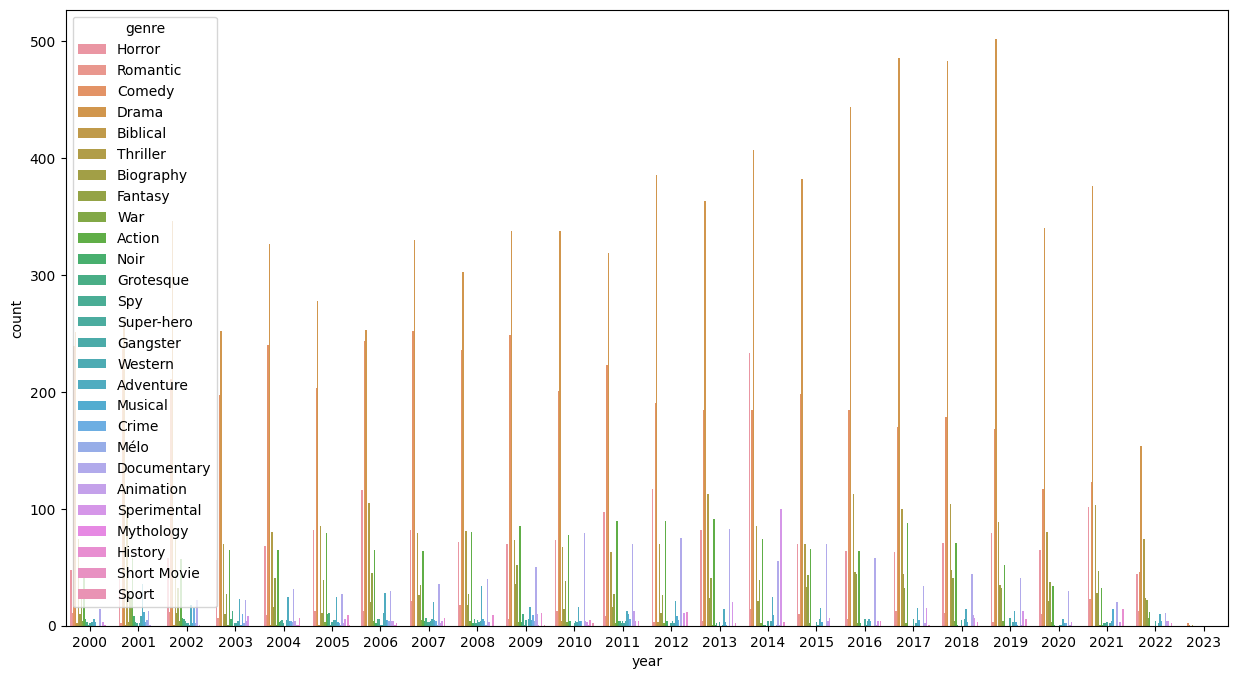

In [279]:
# Draw a plot to show total movies released in each year with hue as 'genre'
plt.figure(figsize=(15, 8))
sns.countplot(x='year', hue='genre', data=df)
plt.show()

In [280]:
# Create a Column with avg_rating as average of avg_vote, critics_vote and public_vote
df['avg_rating'] = (df['avg_vote'] + df['critics_vote'] + df['public_vote'])/3
df['avg_rating'].describe()

count    21815.000000
mean         5.740444
std          1.280415
min          1.000000
25%          4.933333
50%          5.933333
75%          6.733333
max         10.000000
Name: avg_rating, dtype: float64

In [281]:
# Calculate the average rating of each genre
df_genre = df.groupby('genre')['avg_rating'].mean()
# Calculate which genre has the highest average rating and which has the lowest
print("Highest average rating:", df.groupby('genre')['avg_rating'].mean().idxmax())
print("Lowest average rating:", df.groupby('genre')['avg_rating'].mean().idxmin())

Highest average rating: Short Movie
Lowest average rating: Biblical


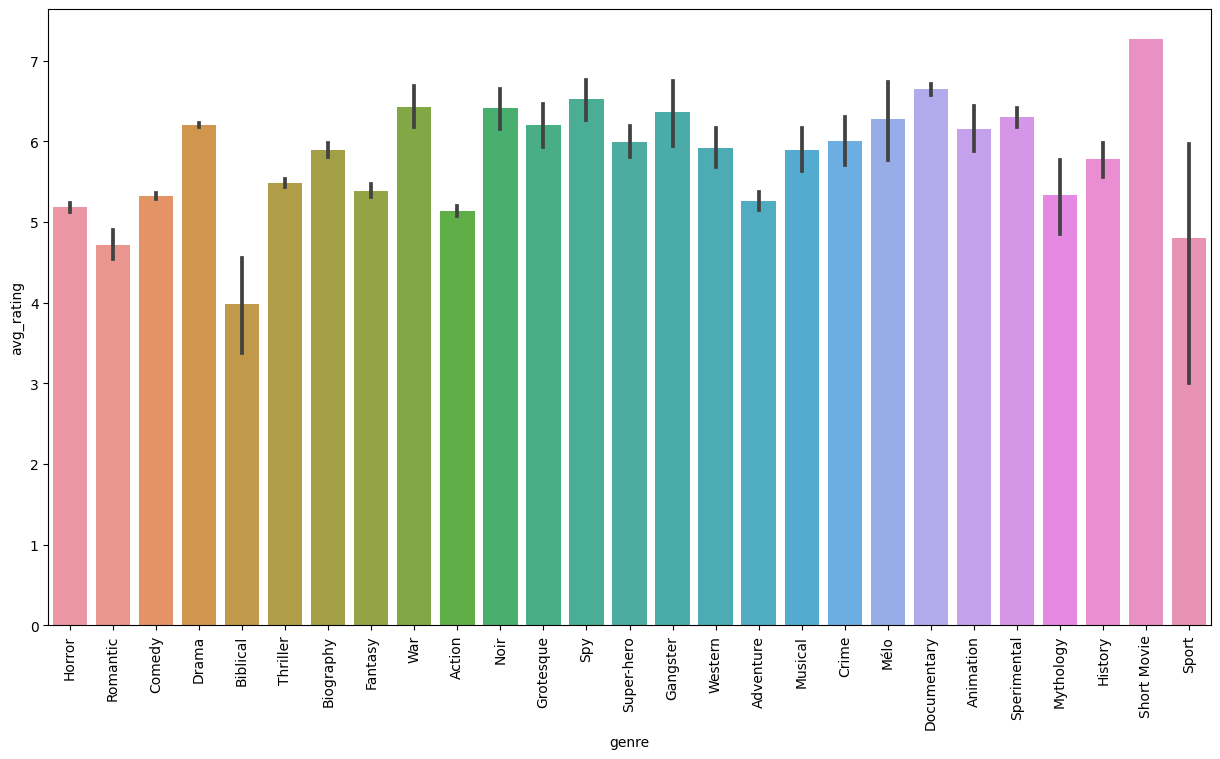

In [282]:
# Plot a barplot to show the average rating of each genre and represent the x values as vertical
plt.figure(figsize=(15, 8))
sns.barplot(x='genre', y='avg_rating', data=df)
plt.xticks(rotation=90)
plt.show()

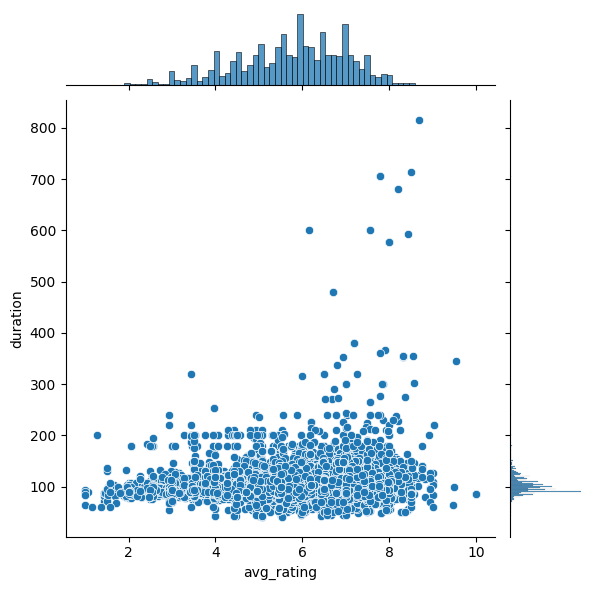

In [283]:
# Check if there is any relationship between the average rating and the duration of the movie
sns.jointplot(x='avg_rating', y='duration', data=df)
plt.show()

In [284]:
# Top 10 director with highest average rating
df_directors = df.groupby('directors')['avg_rating'].mean().sort_values(ascending=False).head(10)
df_directors

directors
Peter Watkins           9.533333
Catarina Vasconcelos    9.500000
Gregory Colbert         9.466667
Jorge Gaggero           9.000000
Amit Dutta              8.933333
Federico Sfascia        8.933333
Shahram Mokri           8.933333
Brett Gaylor            8.823333
Feo Aladag              8.766667
David Easteal           8.766667
Name: avg_rating, dtype: float64

In [285]:
# Top 10 director with highest number of movies
df['directors'].value_counts().head(10)

Alberto Sironi        42
Takashi Miike         42
Werner Herzog         37
Ken Loach             37
Lars von Trier        34
Woody Allen           32
Steven Soderbergh     31
Manoel de Oliveira    30
Kim Ki-duk            27
Carlo Vanzina         27
Name: directors, dtype: int64

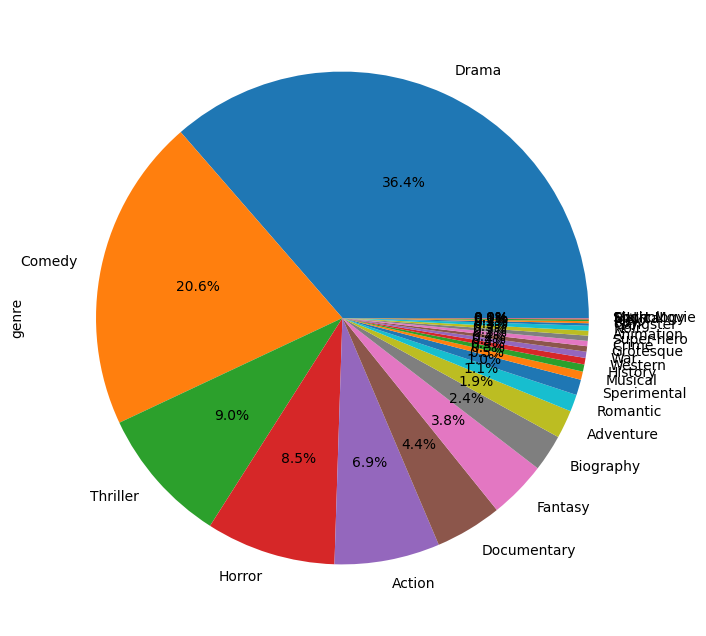

In [286]:
# Plot a pie chart to show the percentage of movies in each genre and adjust the text label as vertical
plt.figure(figsize=(15, 8))
df['genre'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [287]:
# Print the Most popular of each genre based on avg_rating
for genre in df['genre'].unique():
    genre_movies = df[df['genre'] == genre].sort_values(by='avg_rating', ascending=False)
    if not genre_movies.empty and genre_movies.index.max() >= 0:
        print("Most popular", genre, "movie is", genre_movies['title'].iloc[0])

Most popular Horror movie is Sorgoï Prakov, My European Dream
Most popular Romantic movie is Hua yang nian hua
Most popular Comedy movie is I rec u
Most popular Drama movie is La commune (Paris, 1871)
Most popular Biblical movie is The Passion of the Christ
Most popular Thriller movie is The Missing
Most popular Biography movie is The Irishman
Most popular Fantasy movie is Serpentário
Most popular War movie is Apocalypse Now: Redux
Most popular Action movie is Ninja: Shadow of a Tear
Most popular Noir movie is Mulholland Drive
Most popular Grotesque movie is Sílení
Most popular Spy movie is The Missing Person
Most popular Super-hero movie is The Dark Knight
Most popular Gangster movie is The Departed
Most popular Western movie is Django Unchained
Most popular Adventure movie is El Abrazo de la Serpiente
Most popular Musical movie is Can't Stand Losing You
Most popular Crime movie is Wu jian dao 3
Most popular Mélo movie is Hable con ella
Most popular Documentary movie is Rembrandt's J'

In [288]:
# Make a new dataframe with columns as 'Most Popular Movie', 'Genre', 'Director', 'Year', 'Duration', 'Avg Rating'
df_popular = pd.DataFrame(columns=['Most Popular Movie', 'Genre', 'Director', 'Year', 'Duration', 'Avg Rating'])
# Loop through each genre
for genre in df['genre'].unique():
    genre_movies = df[df['genre'] == genre].sort_values(by='avg_rating', ascending=False)
    if not genre_movies.empty and genre_movies.index.max() >= 0:
        # Add a row to the dataframe with the details of the most popular movie of each genre
        df_popular = df_popular.append({'Most Popular Movie': genre_movies['title'].iloc[0], 'Genre': genre, 'Director': genre_movies['directors'].iloc[0], 'Year': genre_movies['year'].iloc[0], 'Duration': genre_movies['duration'].iloc[0], 'Avg Rating': genre_movies['avg_rating'].iloc[0]}, ignore_index=True)
# Print the dataframe
df_popular

/var/folders/pp/s3n9tcsd1f7dn5x615mnz9v00000gn/T/ipykernel_2375/2836496801.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_popular = df_popular.append({'Most Popular Movie': genre_movies['title'].iloc[0], 'Genre': genre, 'Director': genre_movies['directors'].iloc[0], 'Year': genre_movies['year'].iloc[0], 'Duration': genre_movies['duration'].iloc[0], 'Avg Rating': genre_movies['avg_rating'].iloc[0]}, ignore_index=True)
/var/folders/pp/s3n9tcsd1f7dn5x615mnz9v00000gn/T/ipykernel_2375/2836496801.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_popular = df_popular.append({'Most Popular Movie': genre_movies['title'].iloc[0], 'Genre': genre, 'Director': genre_movies['directors'].iloc[0], 'Year': genre_movies['year'].iloc[0], 'Duration': genre_movies['duration'].iloc[0], 'Avg Rating': genre_movies['avg_ra

,Most Popular Movie,Genre,Director,Year,Duration,Avg Rating
0,"Sorgoï Prakov, My European Dream",Horror,Rafaël Cherkaski,2013,92,8.500000
1,Hua yang nian hua,Romantic,Wong Kar-wai,2000,98,8.360000
2,I rec u,Comedy,Federico Sfascia,2015,116,8.933333
3,"La commune (Paris, 1871)",Drama,Peter Watkins,2000,345,9.533333
4,The Passion of the Christ,Biblical,Mel Gibson,2004,126,5.806667
5,The Missing,Thriller,NaN,2014,137,8.533333
6,The Irishman,Biography,Martin Scorsese,2019,210,8.243333
7,Serpentário,Fantasy,Carlos Conceição,2019,83,8.500000
8,Apocalypse Now: Redux,War,Francis Ford Coppola,2000,200,8.926667
9,Ninja: Shadow of a Tear,Action,Isaac Florentine,2013,95,8.933333


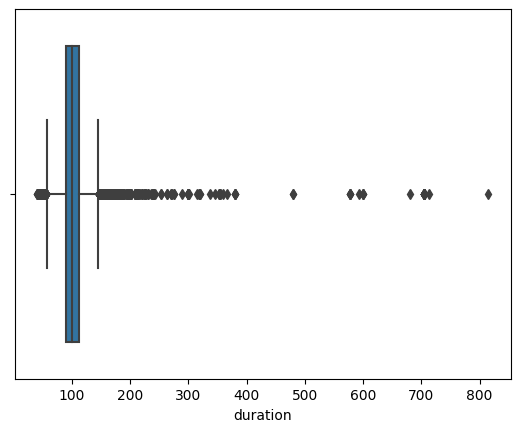

Interquartile range: 22.0
Lower bound: 57.0
Upper bound: 145.0
Number of outliers: 871


In [289]:
# Are there any outliers in the duration of movies in the dataset? Use a box plot to visualize the distribution and calculate the interquartile range and identify any outliers.
sns.boxplot(x=df['duration'])
plt.show()
# Calculate the interquartile range
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile range:", IQR)
# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
# Check if there are any outliers
print("Number of outliers:", df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)].shape[0])


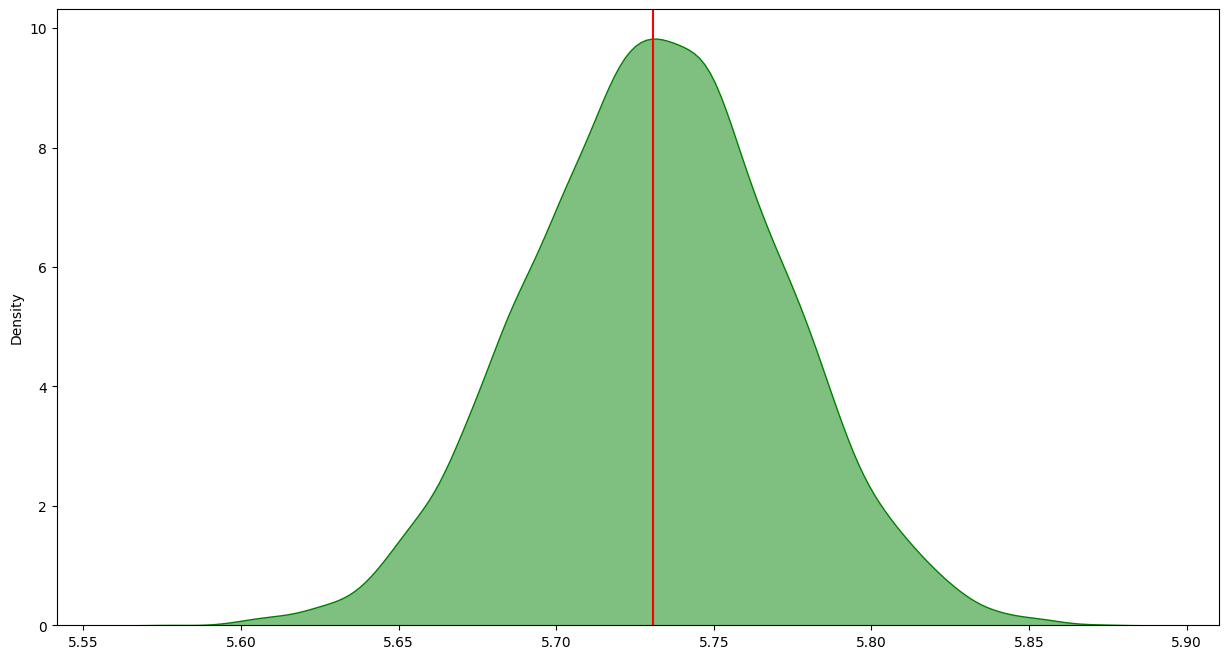

In [290]:
## Central Limit Theorem
num_of_samples = 10000

size= 1000
sample_means = []
for i in range(num_of_samples):
    sample = df['avg_vote'].sample(size, replace=True)
    sample_means.append(sample.mean())
mean = df['avg_vote'].mean()

plt.figure(figsize=(15, 8))
sns.kdeplot(sample_means, fill=True, alpha=0.5, color='green' )
plt.axvline(mean, color='red', label='Average vote Mean')
plt.show()

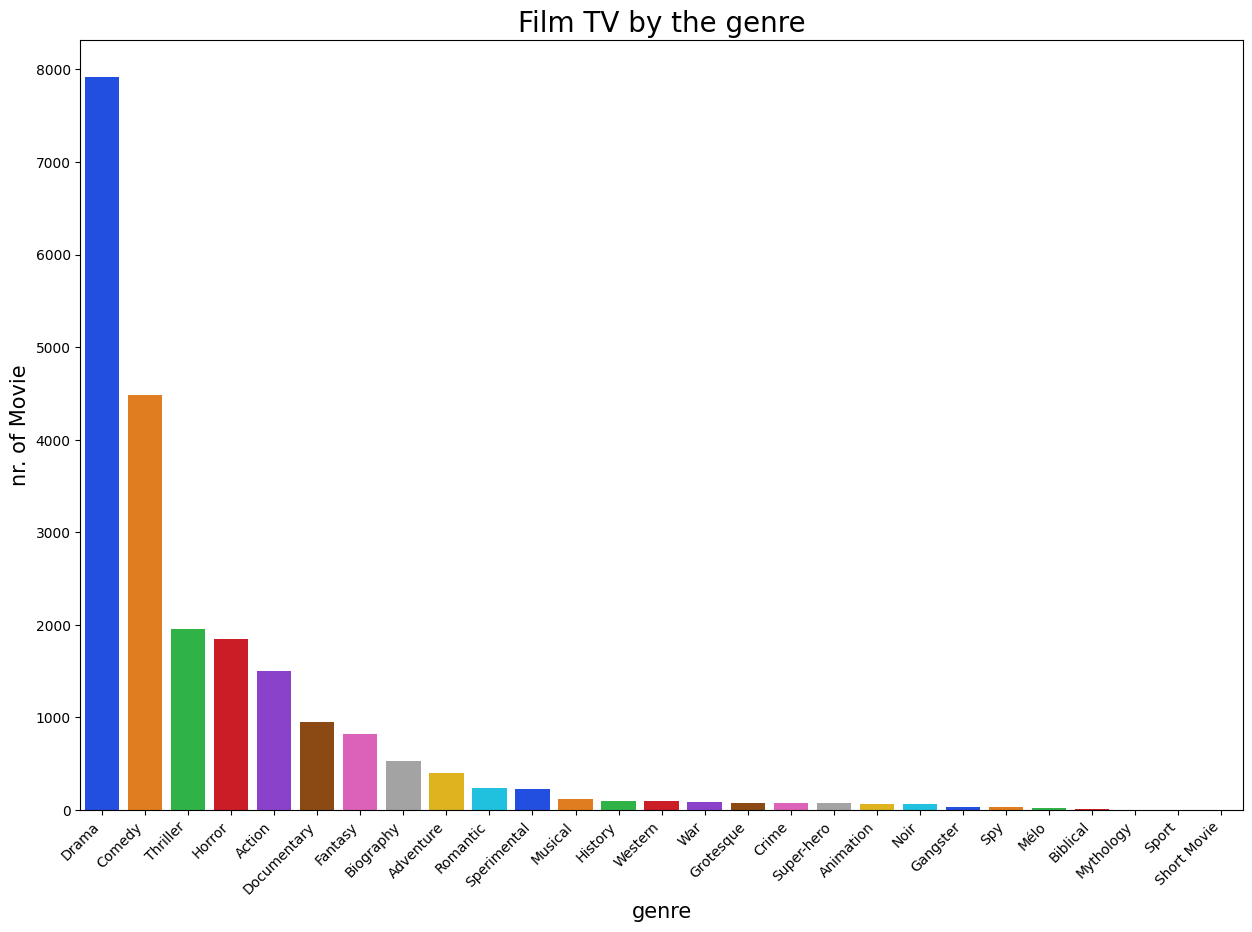

In [291]:
plt.figure(figsize=(15,10))
plt.title('Film TV by the genre', size=20)
sns.barplot(x=df.genre.value_counts().index, y=df.genre.value_counts(), palette="bright")
plt.ylabel('nr. of Movie', size=15)
plt.xlabel('genre',size=15)
plt.xticks(rotation=45, ha='right')

plt.show()

In [292]:
# check if there is a correlation between the average rating and the duration of the movie using pearson p-value


corr, p_value = pearsonr(df["avg_rating"], df["duration"])

print("Pearson correlation coefficient:", corr)




Pearson correlation coefficient: 0.1651175371099388


In [293]:
# group the movies by country and calculate the mean duration for each country
avg_duration_by_country = df.groupby('country')['duration'].mean()

# sort the resulting dataframe by mean duration
avg_duration_by_country = avg_duration_by_country.sort_values()

# print the country with the shortest and longest movies on average
print("Country with the shortest movies on average:", avg_duration_by_country.index[0])
print("Country with the longest movies on average:", avg_duration_by_country.index[-1])


Country with the shortest movies on average: Italy 
Country with the longest movies on average:  Faroe Islands


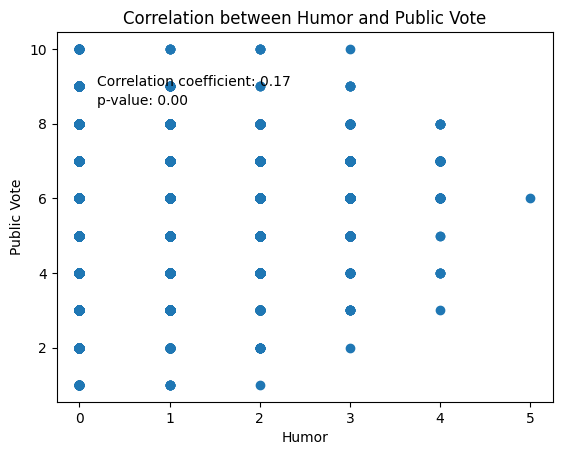

Pearson correlation between public_vote and humor: 0.029753595934425982


In [294]:
# plot a scatter plot
plt.scatter(df['humor'], df['public_vote'])
plt.title('Correlation between Humor and Public Vote')
plt.xlabel('Humor')
plt.ylabel('Public Vote')
plt.text(0.2, 9, 'Correlation coefficient: {:.2f}'.format(corr))
plt.text(0.2, 8.5, 'p-value: {:.2f}'.format(p_value))
plt.show()

# Get the value of the correlation coefficient between the public_vote and humor columns
corr = df['public_vote'].corr(df['humor'], method='pearson')
print("Pearson correlation between public_vote and humor:", corr)


In [295]:
# filter the movies by duration longer than 120 minutes and those with duration shorter than 90 minutes
# hypothesis: movies with duration longer than 120 minutes have higher average rating than those with duration shorter than 90 minutes
long_movies = df[df['duration'] > 120]['avg_rating']
short_movies = df[df['duration'] < 90]['avg_rating']

# perform two-sample t-test
t_statistic, p_value = ttest_ind(long_movies, short_movies)

# print the result
print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the average rating of movies with duration longer than 120 minutes and those with duration shorter than 90 minutes")
else:
    print("There is no significant difference in the average rating of movies with duration longer than 120 minutes and those with duration shorter than 90 minutes")


t-statistic: 22.230988973543155
p-value: 8.666805369436849e-106
There is a significant difference in the average rating of movies with duration longer than 120 minutes and those with duration shorter than 90 minutes


In [307]:
top_countries = df['country'].value_counts().nlargest(5).index.tolist()
top_genres = df['genre'].value_counts().nlargest(2).index.tolist()

# create a new dataframe with only the top 5 countries and genres
df_top = df[(df['country'].isin(top_countries)) & (df['genre'].isin(top_genres))]

# create the contingency table
ct = pd.crosstab(df_top['country'], df_top['genre'])
ct



genre,Comedy,Drama
country,,
France,86,458
France,411,698
Great Britain,181,338
Italy,1034,1089
United States,1620,1447


In [308]:
chi2_stat, p_val, dof, expected = chi2_contingency(ct)

# print the results
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 324.0669727663347
p-value: 6.950688024881002e-69
Degrees of Freedom: 4
Expected Frequencies:
 [[ 246.21135561  297.78864439]
 [ 501.9271937   607.0728063 ]
 [ 234.89649552  284.10350448]
 [ 960.85791904 1162.14208096]
 [1388.10703613 1678.89296387]]


In [306]:
df_genre = df.groupby('genre')['avg_rating']
mean = df_genre.mean()
std = df_genre.std()

# merging into df
df_genre = pd.DataFrame({'Mean': mean, 'Std': std})
df_genre.fillna(0, inplace=True)
df_genre

,Mean,Std
genre,,
Action,5.133495,1.256471
Adventure,5.265715,1.182293
Animation,6.149524,1.200461
Biblical,3.984359,1.178907
Biography,5.895900,1.069083
Comedy,5.319009,1.275462
Crime,6.000267,1.304135
Documentary,6.645724,1.041619
Drama,6.202715,1.139392


In [305]:
grand_mean = df['avg_rating'].mean()
ssb = (27*(grand_mean - mean)**2).sum()  ## sum of square between
ssw = (df_genre['Std']**2).sum()  ## sum of square within
dfb = 27-1
dfw = 27*(27-1)
msb = ssb/dfb       ## mean of square between
msw = ssw/dfw       ## mean of square within
f_statistic = msb/msw
p_val = 1-stats.f.cdf(f_statistic, dfb, dfw)
p_val

1.1102230246251565e-16